## Sampling from a joint multivariate distribution 

The Gibbs sampler is a special case of the more general Metropol is Hastings algorithm that is useful when 
(1) sampling from a multivariate posterior is not feasible
(2) sampling from the conditional distributions for each parameter (or blocks of them) is feasible

Sequential sampling from 1D conditional distribution of one variable given all other variables is equavillant to sampling from multivariate distribution of all the variables. 

This requires that the conditional distribution should be tractable to sample from it.  


$$ P(x_{i}|x_{-i})=\frac{P(x_{i}, x_{-i})}{Const}$$

$x_{-i}$ is a vector of all variables except $x_{i}$

## Why is Gibbs sampling  a special case of the more general Metropol is Hastings algorithm? 

We will use the conditional probability instead of the proposal distribution which is not needed any more. see below how the drawn samples are always accepted. 

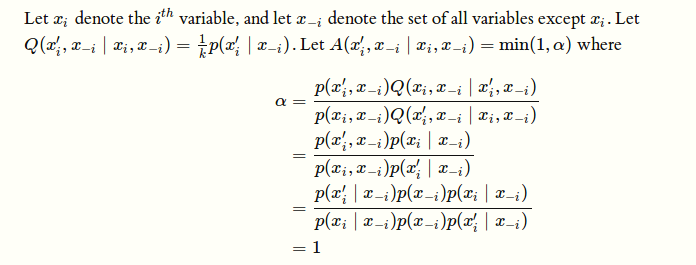

In [50]:
from IPython.display import Image
Image(filename='bbb.jpeg')
# taken from https://ermongroup.github.io/cs323-notes/probabilistic/gibbs/ 

Pros: 

    1- reduce multidimensional sampling to a sequence of 1D univariant sampling
    
    2- A few lines of code
    
Cons: 

    1- High correlated samples due to thw fact that the new samples do not jump so far and consequently do not
    cover a large region of the space. 
    
    2- The conditional distribution should be tractable so samples can be drawn. 
    
    3- Slow converges due to the small jumps (1)
    
    4- Not paralling for high dimensional space as variables are sampled one ata time
    
    

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la

In the following lines we are going to sample from a 2D Gaussian posterior Distribution using the Direct method and Gibbs sampling. Consider the bivariant normal distribution has the following density:

$$\begin{eqnarray*} \begin{pmatrix} x_1\\ x_2 \end{pmatrix} & \sim & N\left[\left(\begin{array}{c} 0\\ 0 \end{array}\right),\left(\begin{array}{ccc} 1 & 0.8 \\ 0.8 & 1 \end{array}\right)\right]\\ \end{eqnarray*}$$


<i><b><center> Mean vector </center></b></i>

$$\mu = 
 \begin{pmatrix}
  \mu_1 \\
  \mu_2
 \end{pmatrix} = 
 \begin{pmatrix}
  0 \\
  0
 \end{pmatrix}$$
 
 
<i><b><center> Covariance Matrix </center></b></i>

$$C = \begin{bmatrix}
       1. & 0.8    \\[0.3em]
       0.8 & 1. \\[0.3em]
      \end{bmatrix}$$



# Deriving the conditional distribution

Since the joint posterior distribution is a multivariate normal distribution, we will use its conditional property to derive the conditional distribution of one variable given the others. 

(1) $ X_{1}|X_{2}: x_{1} \text{ ~ } N(\mu,D)$

$ \mu= \mu_1 + C_{12} C_{22}^{-1}(x_{2}-\mu_2)= 0.8 x_{2}$

$D=C_{11}-C_{12}C_{22}^{-1}C_{21}=1-0.8^{2}$

$$ x_{1} \text{ ~ } N(0.8 x_{2}, 1- 0.8^2)$$
$$ x_{1} \text{ ~ } 0.8 x_{2} + \sqrt{1-0.8^2}N(0,1)$$


(2) $ X_{2}|X_{1}: x_{2} \text{ ~ } N(\mu,D)$

$ \mu= \mu_2 + C_{21} C_{11}^{-1}(x_{1}-\mu_1)= 0.8 x_{1}$

$ D=C_{22}-C_{21}C_{11}^{-1}C_{12}=1-0.8^{2}$

$$ x_{2} \text{ ~ } N(0.8 x_{1}, 1- 0.8^2)$$
$$ x_{2} \text{ ~ } 0.8 x_{1} + \sqrt{1-0.8^2}N(0,1)$$

/home/bashar/anaconda3/envs/conda_env/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


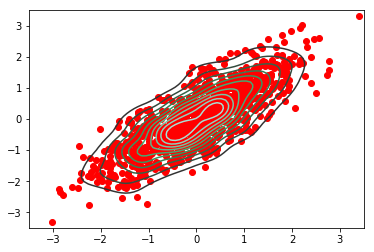

In [35]:
sigma = np.array([[1,0.8],[0.8,1.]])
mu = np.zeros(2)
ys = np.random.multivariate_normal(mu, sigma, 1000)
sns.kdeplot(ys)# Deriving the conditional distribution


plt.axis([-3.5,3.5,-3.5,3.5])

plt.scatter(ys[:,0], ys[:,1], color='r')

$\begin{eqnarray*} \begin{pmatrix} \theta_1\\ \theta_2 \end{pmatrix} & \sim & N\left[\left(\begin{array}{c} 0\\ 0 \end{array}\right),\left(\begin{array}{ccc} 1 & \rho\\ \rho & 1 \end{array}\right)\right]\\ \end{eqnarray*}$

In [44]:
x1_list=[]
x2_list=[]

x2=-4
x2_list.append(x2)

N=2000
for i in range(N):
    x1=0.8*x2+np.sqrt(1-0.8**2)*np.random.normal(0,1,1)
    x1_list.append(x1)
    
    x2=0.8*x1+np.sqrt(1-0.8**2)*np.random.normal(0,1,1)
    if i<N-1:
        x2_list.append(x2)


In [45]:
len(x1_list)

2000

/home/bashar/anaconda3/envs/conda_env/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


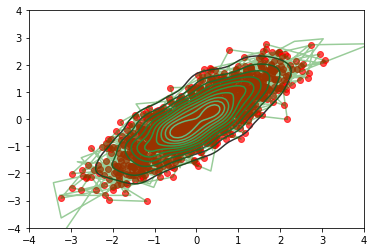

In [48]:
sns.kdeplot(ys)
plt.axis([-4,4,-4,4])
#plt.scatter(ys[:,0], ys[:,1], color='r')
plt.plot(x1_list,x2_list,color='g', alpha=0.4)
plt.scatter(x1_list[500::],x2_list[500::],color='r', alpha=0.7)

